In [1]:
import rasterio
import geopandas as gpd
import pyproj
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
import lightgbm as lgbm
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from numpy import *
import numpy as np

In [2]:
path = 'C:/Users/Rasmu/Documents/Thesis/Hardangervidda/Training_Data/'
#path = 'C://Users/rasmu/Documents/Thesis/Hardangervidda/Dates/20200306/sampled/SD.shp'

In [3]:
df = gpd.read_file(path)

In [4]:
df.head(50)

,SD,VH,Diff,Ratio,Subtract,DEM,geometry
0,0.730,-15.445336,NaN,2.119177,-8.156969,NaN,POINT (128470.872 6639431.133)
1,0.755,-16.093913,5.351500,1.963807,-7.898650,NaN,POINT (128468.317 6640352.164)
2,0.740,-16.934799,NaN,1.907084,-8.054857,NaN,POINT (128465.332 6641433.749)
3,0.660,-16.611764,4.769222,1.883342,-7.791397,NaN,POINT (128460.875 6642805.322)
4,0.710,-16.872174,4.318822,1.875585,-7.876488,NaN,POINT (128458.826 6643496.071)
5,0.660,-17.514438,3.579883,1.785225,-7.703663,NaN,POINT (128456.415 6644396.936)
6,0.710,-17.881816,2.743953,1.821579,-8.065161,NaN,POINT (128453.314 6645428.526)
7,0.640,-17.926318,NaN,1.847781,-8.224780,NaN,POINT (128451.874 6645968.894)
8,0.640,-18.407296,NaN,1.780200,-8.067281,NaN,POINT (128444.303 6648502.443)
9,0.720,-18.407296,NaN,1.780200,-8.067281,NaN,POINT (128444.303 6648502.443)


(800.0, 1600.0)

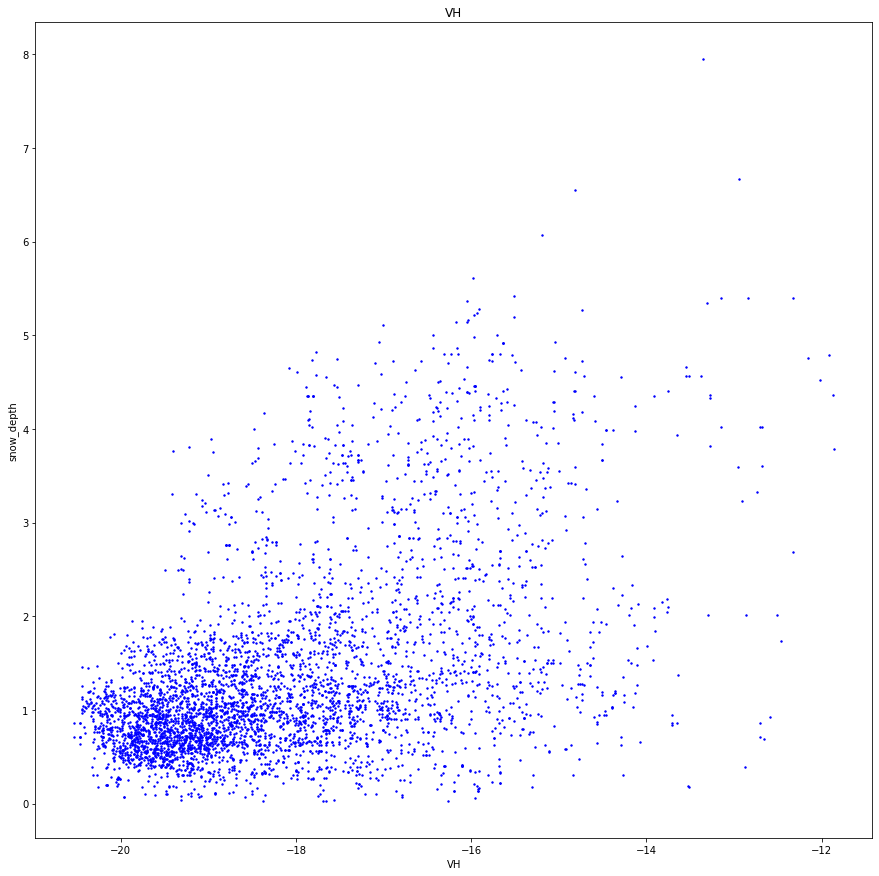

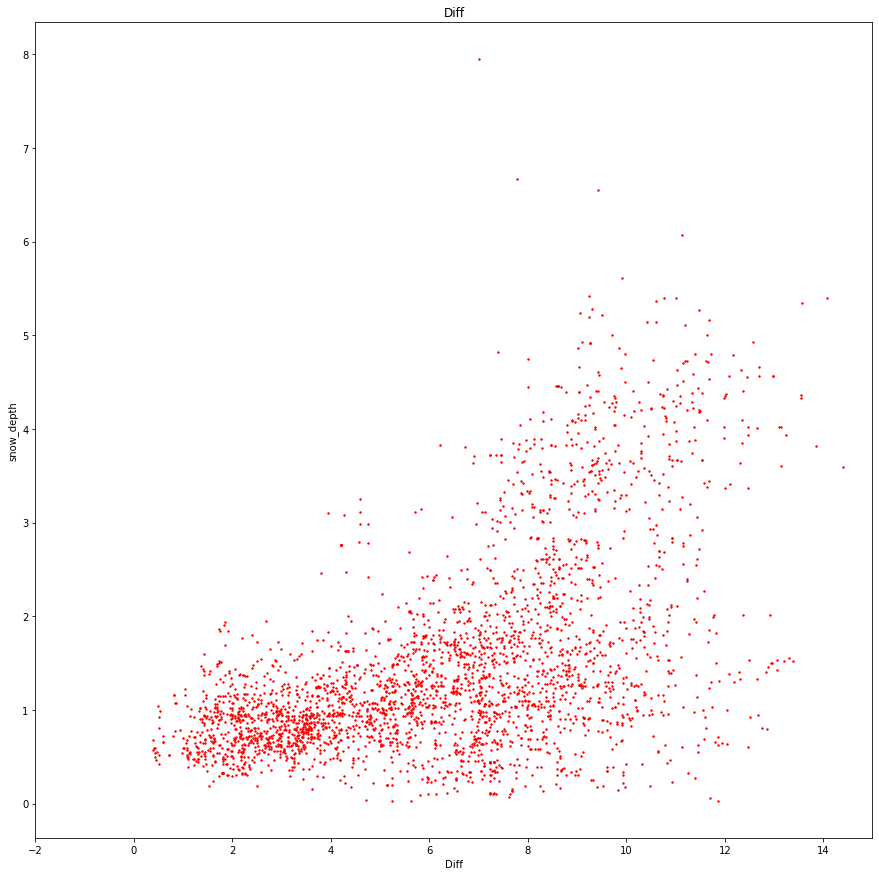

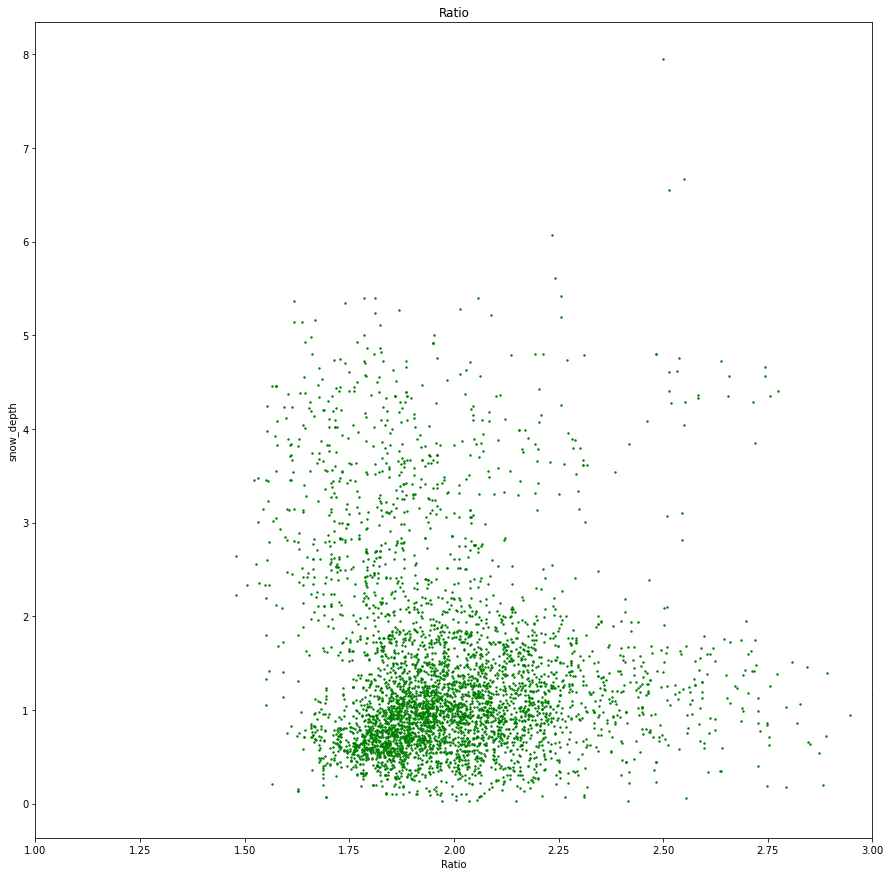

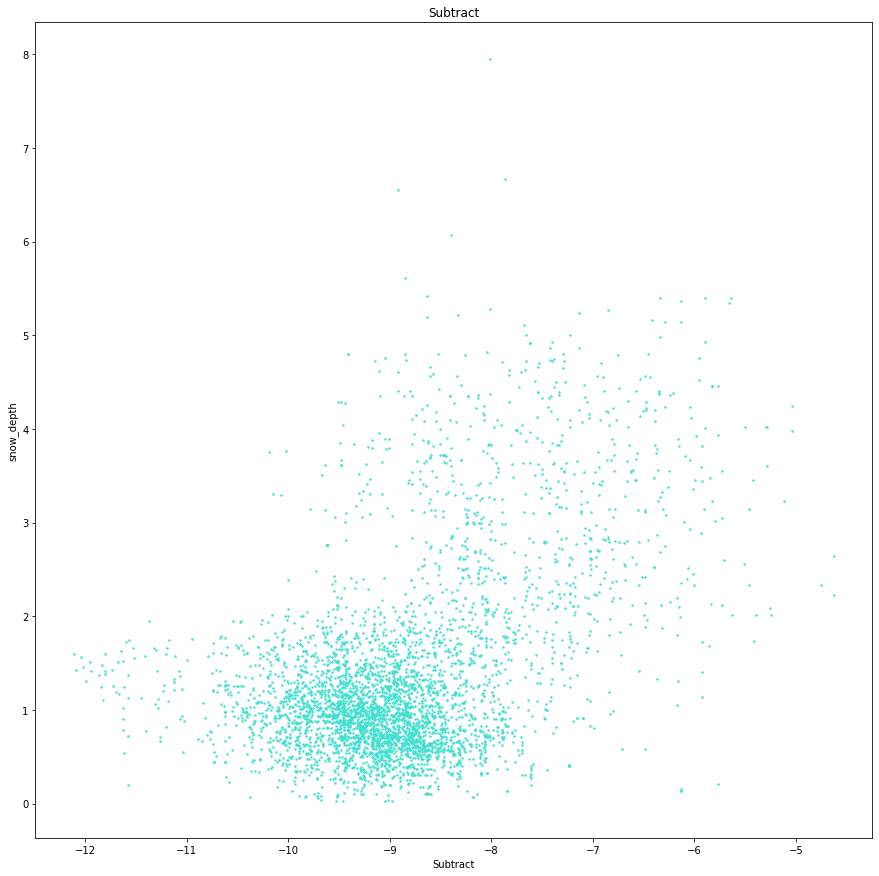

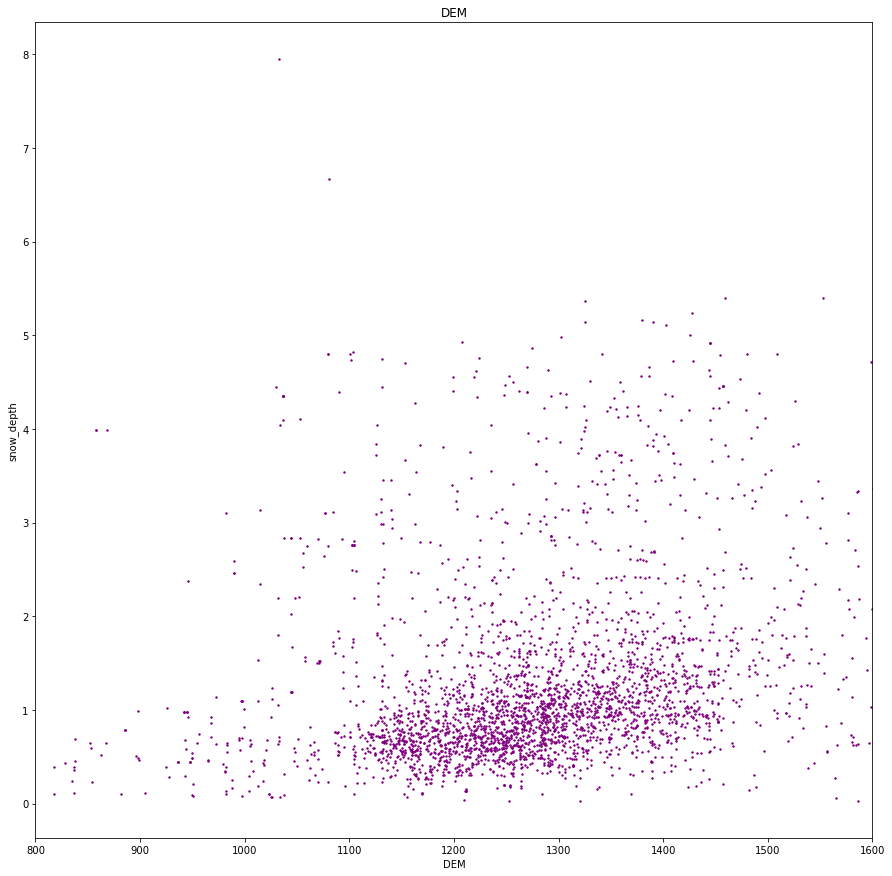

In [5]:
plt.figure(figsize=(15, 15))
plt.title('VH')
plt.xlabel('VH')
plt.ylabel('snow_depth')
#plt.xlim([-1, 5])
plt.scatter(df.VH, df.SD, color='blue',s=2);

plt.figure(figsize=(15, 15))
plt.title('Diff')
plt.xlabel('Diff')
plt.ylabel('snow_depth')
plt.scatter(df.Diff, df.SD, color='red',s=2);
plt.xlim([-2, 15])

plt.figure(figsize=(15, 15))
plt.title('Ratio')
plt.xlabel('Ratio')
plt.ylabel('snow_depth')
plt.scatter(df.Ratio, df.SD, color='green',s=2);
plt.xlim([1, 3])

#plt.figure(figsize=(15, 15))
#plt.title('VH_Diff')
#plt.xlabel('VH_Diff')
#plt.ylabel('snow_depth')
#plt.scatter(df.VH_Diff, df.SD, color='orange');

plt.figure(figsize=(15, 15))
plt.title('Subtract')
plt.xlabel('Subtract')
plt.ylabel('snow_depth')
plt.scatter(df.Subtract, df.SD, color='turquoise',s=2);

plt.figure(figsize=(15, 15))
plt.title('DEM')
plt.xlabel('DEM')
plt.ylabel('snow_depth')
plt.scatter(df.DEM, df.SD, color='purple',s=2);
plt.xlim([800, 1600])

In [6]:
#df = df.replace(np.nan, 0)
#r2 = str(r2_score(df.Subtract, df.SD).round(2))
#print('R2 score is: ', r2)